In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample Data:\n", df.head())


Shape: (8807, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Data types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Sample Data:
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  J

In [4]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# If you want to see them
df[df.duplicated()]

# If you decide to remove them
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (8807, 12)


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


C:\Users\Utkarsha Gupta\AppData\Local\Temp\ipykernel_8692\1252298249.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="Set2")


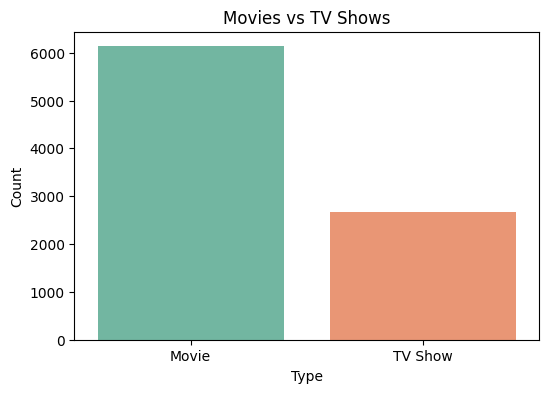

In [5]:
# Count of Movies vs TV Shows
type_counts = df["type"].value_counts()
print(type_counts)


plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


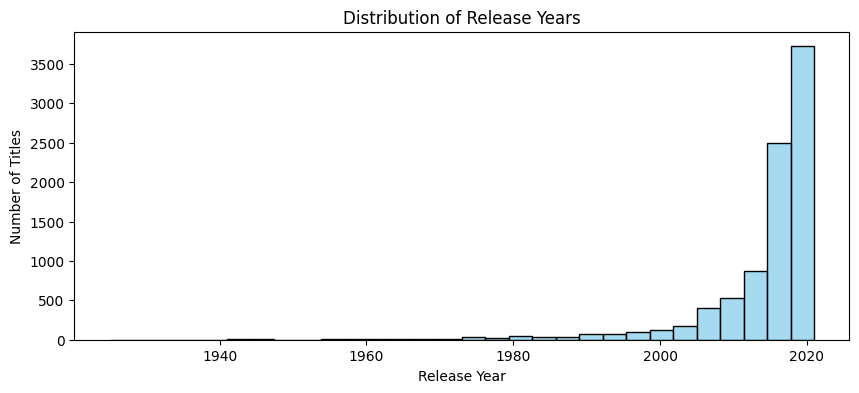

Earliest release year: 1925
Latest release year: 2021
Average release year: 2014.1801975701146


In [6]:
# Distribution of release years
plt.figure(figsize=(10,4))
sns.histplot(df["release_year"].dropna(), bins=30, kde=False, color="skyblue")
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


print("Earliest release year:", df["release_year"].min())
print("Latest release year:", df["release_year"].max())
print("Average release year:", df["release_year"].mean())


rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


C:\Users\Utkarsha Gupta\AppData\Local\Temp\ipykernel_8692\616169228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.head(10).index, y=rating_counts.head(10).values, palette="magma")


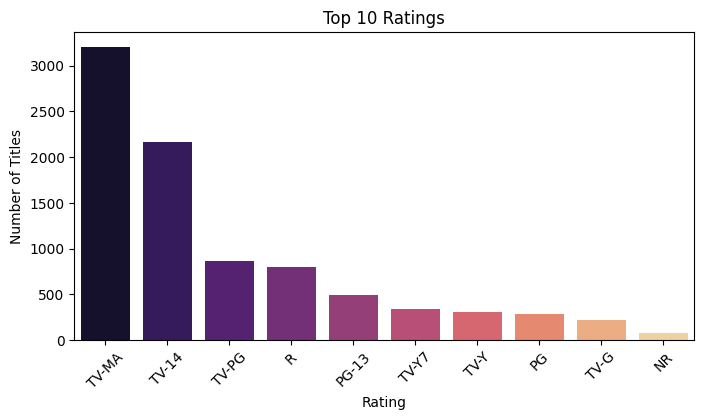

In [7]:
# Most common ratings
rating_counts = df["rating"].value_counts()
print(rating_counts.head(10))  # Top 10 ratings

plt.figure(figsize=(8,4))
sns.barplot(x=rating_counts.head(10).index, y=rating_counts.head(10).values, palette="magma")
plt.title("Top 10 Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


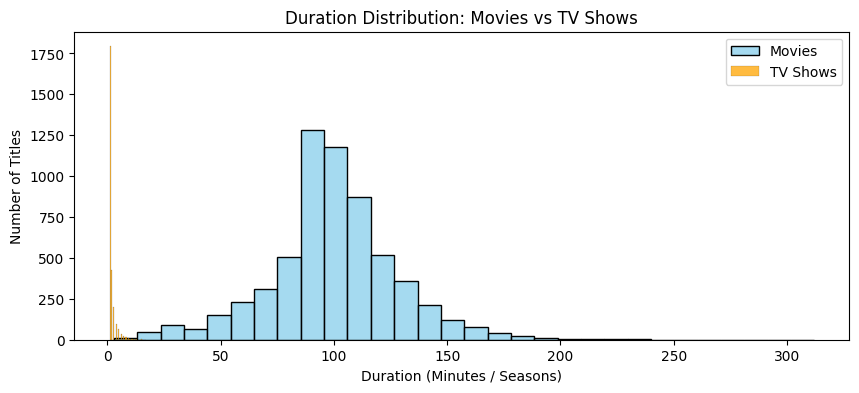

In [8]:
# Duration distribution
# Note: 'duration' column usually has values like "90 min" for movies and "2 Seasons" for TV shows
# Let's extract numbers for plotting

def extract_number(x):
    if pd.isnull(x):
        return None
    return int(x.split()[0])

df['duration_num'] = df['duration'].apply(extract_number)

# Separate movies and TV shows for clarity
movies = df[df['type']=='Movie']
tv_shows = df[df['type']=='TV Show']

plt.figure(figsize=(10,4))
sns.histplot(movies['duration_num'].dropna(), bins=30, kde=False, color="skyblue", label="Movies")
sns.histplot(tv_shows['duration_num'].dropna(), bins=30, kde=False, color="orange", label="TV Shows")
plt.title("Duration Distribution: Movies vs TV Shows")
plt.xlabel("Duration (Minutes / Seasons)")
plt.ylabel("Number of Titles")
plt.legend()
plt.show()

                       Genre  Count
0       International Movies   2752
1                     Dramas   2427
2                   Comedies   1674
3     International TV Shows   1351
4              Documentaries    869
5         Action & Adventure    859
6                  TV Dramas    763
7         Independent Movies    756
8   Children & Family Movies    641
9            Romantic Movies    616
10               TV Comedies    581
11                 Thrillers    577
12            Crime TV Shows    470
13                  Kids' TV    451
14                Docuseries    395


C:\Users\Utkarsha Gupta\AppData\Local\Temp\ipykernel_8692\4220106685.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Genre", data=top_genres, palette="coolwarm")


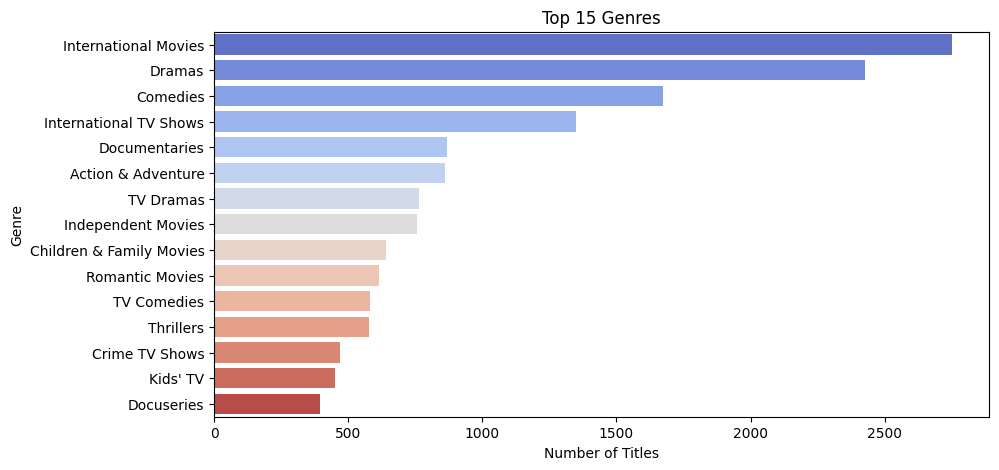

In [9]:
from collections import Counter


# Split genres and count
genres = []
df["listed_in"].dropna().apply(lambda x: genres.extend(x.split(",")))
genre_counts = Counter([g.strip() for g in genres])

# Top 15 genres
top_genres = pd.DataFrame(genre_counts.most_common(15), columns=["Genre","Count"])
print(top_genres)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x="Count", y="Genre", data=top_genres, palette="coolwarm")
plt.title("Top 15 Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Robert Rodriguez           8
Kunle Afolayan             8
Yılmaz Erdoğan             8
Fernando Ayllón            8
Ryan Polito                8
Troy Miller                8
Johnnie To                 8
Shannon Hartman            8
Lance Bangs                8
Quentin Tarantino          8
Hakan Algül                8
Justin G. Dyck             7
McG                        7
Ram Gopal Varma            7
Ozan Açıktan               7
Prakash Satam              7
Toshiya Shinohara          7
Hidenori Inoue             7
Mae Czarina Cruz           7
S.S. Rajamouli             7
Ron Howard                 7
Clint Eastwood             7
Omoni

C:\Users\Utkarsha Gupta\AppData\Local\Temp\ipykernel_8692\187204648.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")


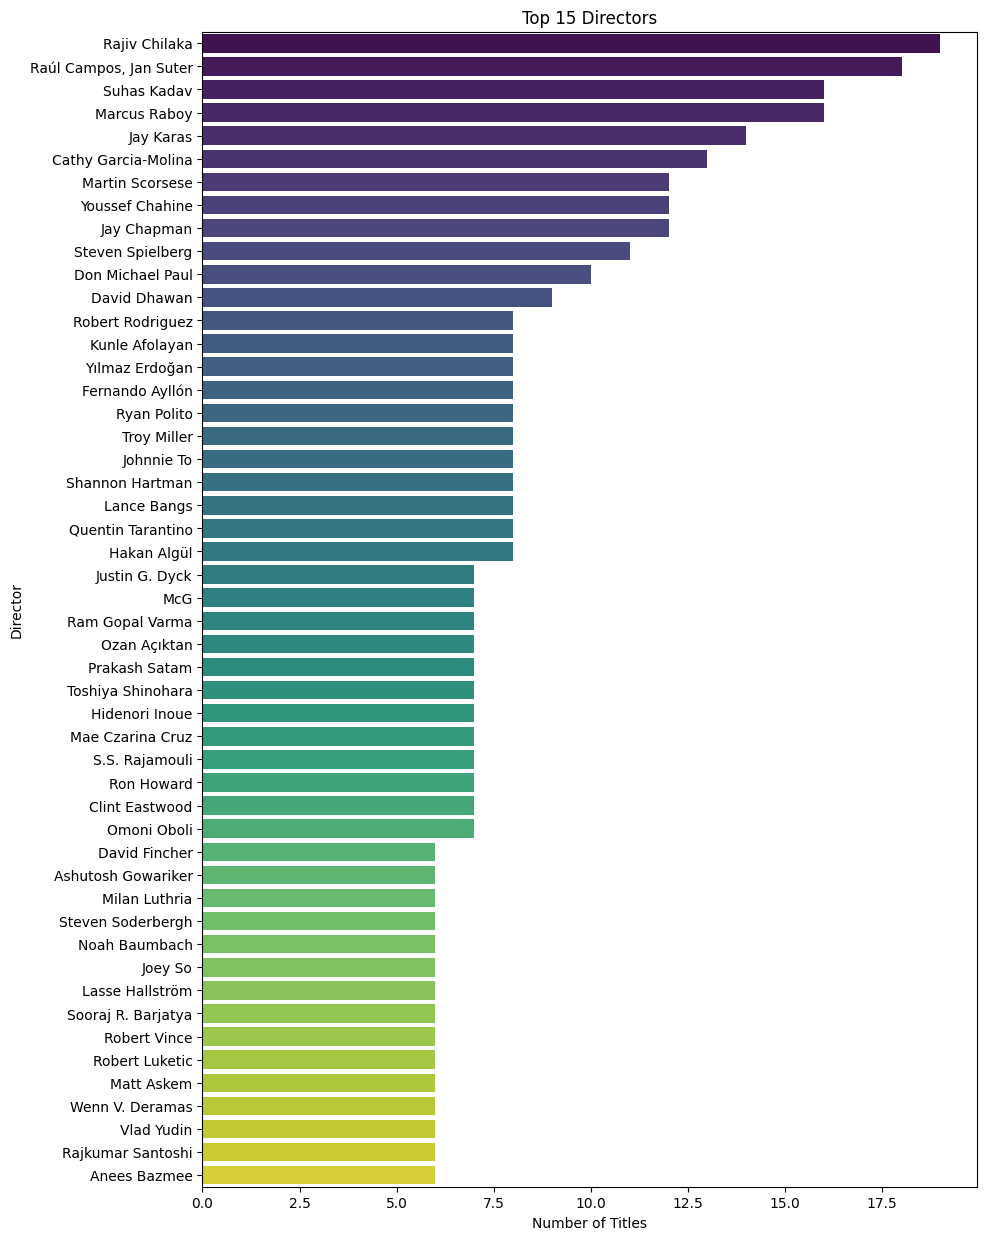

In [10]:
# Count top directors
top_directors = df['director'].dropna().value_counts().head(50)
print(top_directors)

# Visualization
plt.figure(figsize=(10,15))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.title("Top 15 Directors")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


               Actor  Count
0        Anupam Kher     43
1     Shah Rukh Khan     35
2      Julie Tejwani     33
3   Naseeruddin Shah     32
4   Takahiro Sakurai     32
5       Rupa Bhimani     31
6       Akshay Kumar     30
7            Om Puri     30
8          Yuki Kaji     29
9   Amitabh Bachchan     28
10      Paresh Rawal     28
11       Boman Irani     27
12       Rajesh Kava     26
13      Vincent Tong     26
14     Andrea Libman     25


C:\Users\Utkarsha Gupta\AppData\Local\Temp\ipykernel_8692\1114900523.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Actor", data=top_actors, palette="magma")


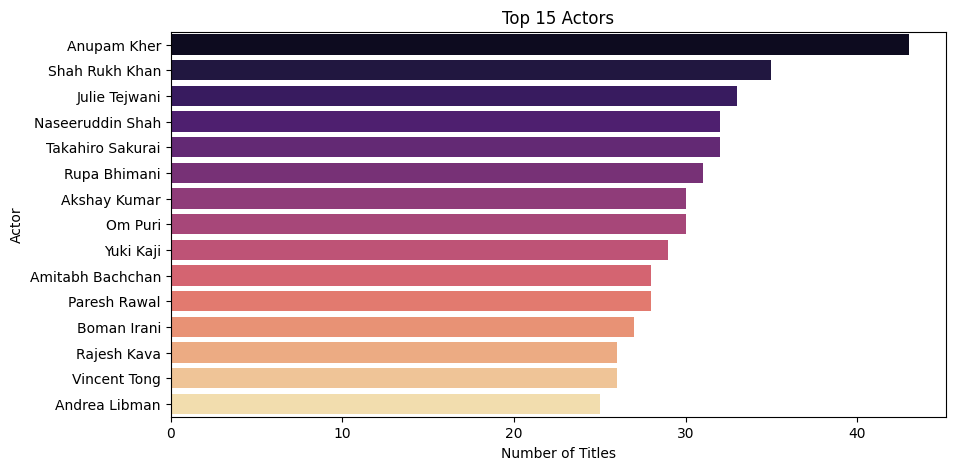

In [11]:
from collections import Counter

# Split cast names and count
actors = []
df['cast'].dropna().apply(lambda x: actors.extend(x.split(",")))
actor_counts = Counter([a.strip() for a in actors])

# Top 15 actors
top_actors = pd.DataFrame(actor_counts.most_common(15), columns=["Actor","Count"])
print(top_actors)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x="Count", y="Actor", data=top_actors, palette="magma")
plt.title("Top 15 Actors")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: count, dtype: int64


C:\Users\Utkarsha Gupta\AppData\Local\Temp\ipykernel_8692\3966763155.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="cool")


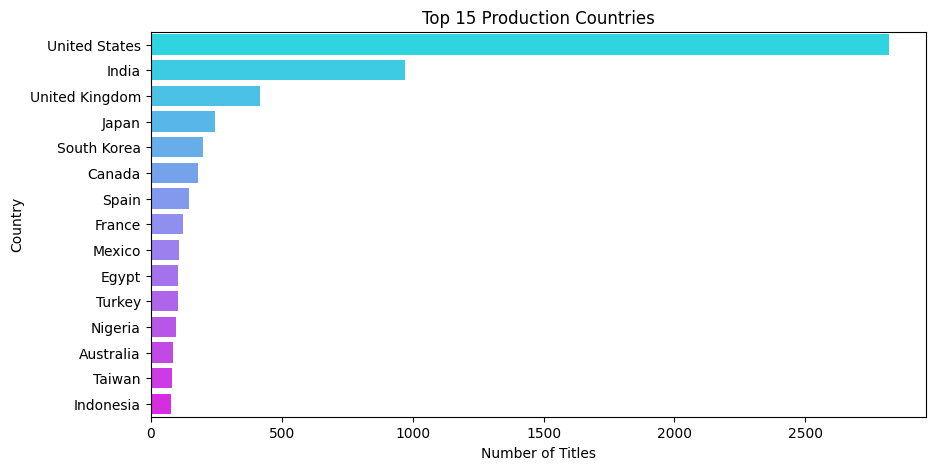

In [12]:
# Count top countries
top_countries = df['country'].dropna().value_counts().head(15)
print(top_countries)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="cool")
plt.title("Top 15 Production Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


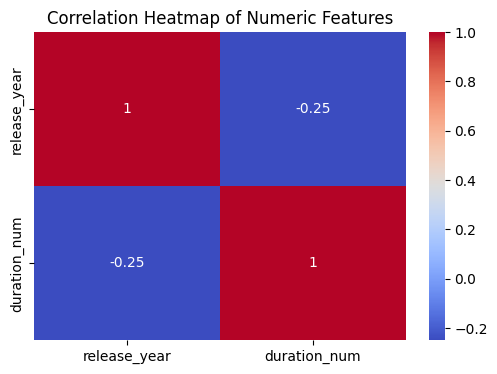

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['release_year', 'duration_num']
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


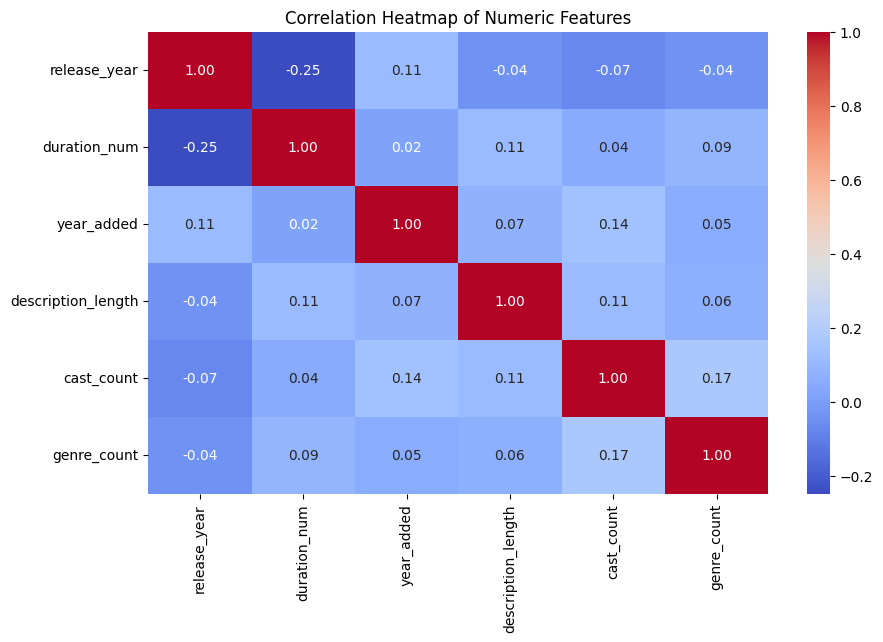

In [15]:
df['description_length'] = df['description'].dropna().apply(lambda x: len(x.split()))

df['cast_count'] = df['cast'].dropna().apply(lambda x: len(x.split(",")))

df['genre_count'] = df['listed_in'].dropna().apply(lambda x: len(x.split(",")))

numeric_cols = ['release_year', 'duration_num', 'year_added', 'description_length', 'cast_count', 'genre_count']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


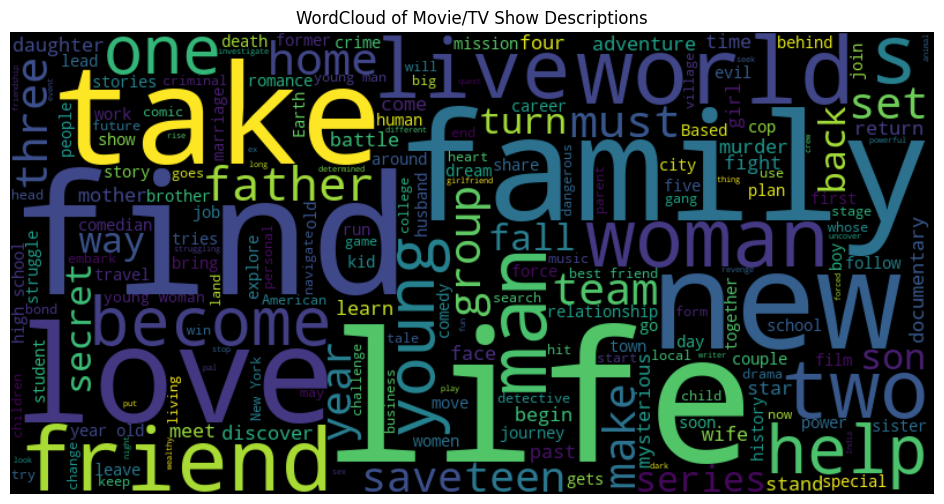

In [16]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into one string
text = " ".join(desc for desc in df['description'].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="viridis").generate(text)

# Plot WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Movie/TV Show Descriptions")
plt.show()



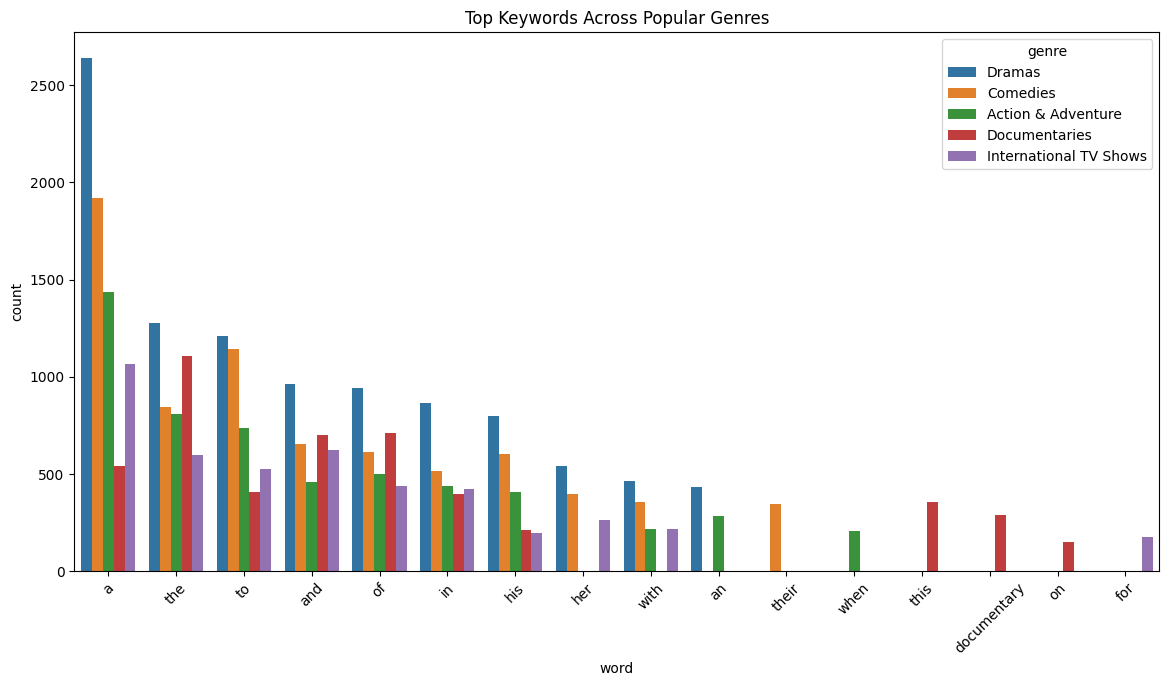

In [17]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Preprocessing helper
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    return text

# Apply cleaning
df['clean_desc'] = df['description'].dropna().apply(clean_text)

# Split genres (listed_in has multiple genres)
df['genre'] = df['listed_in'].str.split(',').str[0].str.strip()

# Pick top 5 genres
top_genres = df['genre'].value_counts().head(5).index

# Collect top keywords for each genre
keywords = {}
for g in top_genres:
    texts = " ".join(df[df['genre'] == g]['clean_desc'])
    words = texts.split()
    common = Counter(words).most_common(10)
    keywords[g] = pd.DataFrame(common, columns=['word', 'count'])

# Combine into one DataFrame
keywords_df = pd.concat(
    [df.assign(genre=g) for g, df in keywords.items()],
    axis=0,
    keys=None
)

# Plot comparison
plt.figure(figsize=(14, 7))
sns.barplot(data=keywords_df, x="word", y="count", hue="genre")
plt.title("Top Keywords Across Popular Genres")
plt.xticks(rotation=45)
plt.show()


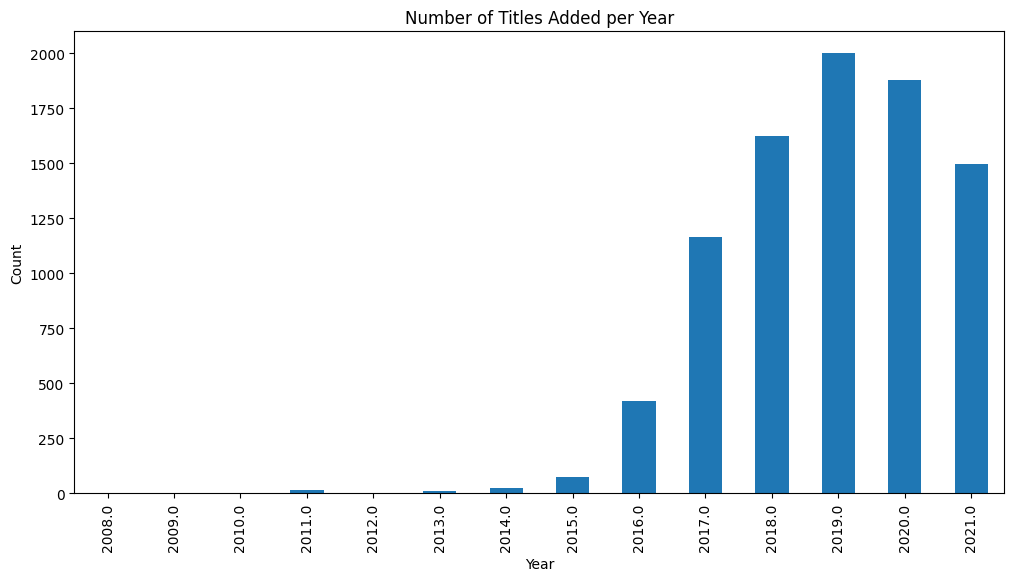

In [18]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year
df['year_added'] = df['date_added'].dt.year

# Drop missing years
yearly_counts = df['year_added'].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
yearly_counts.plot(kind='bar')
plt.title("Number of Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


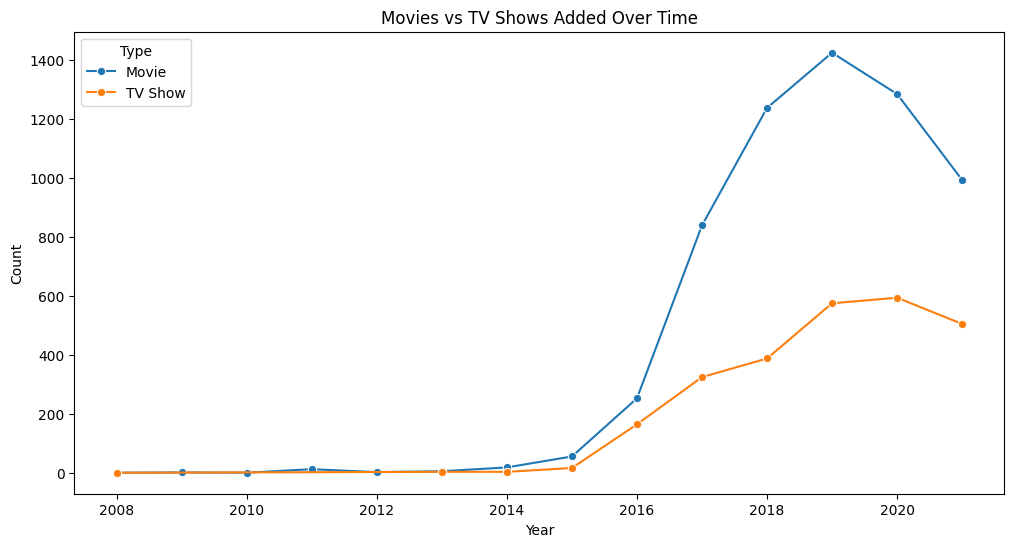

In [19]:
# Group by year and type
trend = df.groupby(['year_added', 'type']).size().reset_index(name='count')

import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x='year_added', y='count', hue='type', marker="o")

plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()


In [20]:
df.isnull().sum()


show_id                  0
type                     0
title                    0
director              2634
cast                   825
country                831
date_added              98
release_year             0
rating                   4
duration                 3
listed_in                0
description              0
duration_num             3
year_added              98
description_length       0
cast_count             825
genre_count              0
clean_desc               0
genre                    0
dtype: int64

In [21]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")
df['duration_num'] = df['duration_num'].fillna(0)
df['cast_count'] = df['cast_count'].fillna(0)


In [22]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                              # lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # keep only letters
    text = " ".join([w for w in text.split() if w not in stop_words])  # remove stopwords
    return text

# Apply cleaning
df['clean_director'] = df['director'].apply(clean_text)
df['clean_cast'] = df['cast'].apply(clean_text)
df['clean_genre'] = df['listed_in'].apply(clean_text)
df['clean_desc'] = df['description'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Utkarsha
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Combine features
df['content'] = df['clean_genre'] + " " + df['clean_cast'] + " " + df['clean_director'] + " " + df['clean_desc']

# Check the result
df[['title', 'content']].head()


,title,content
0,Dick Johnson Is Dead,documentaries unknown kirsten johnson father n...
1,Blood & Water,international tv shows tv dramas tv mysteries ...
2,Ganglands,crime tv shows international tv shows tv actio...
3,Jailbirds New Orleans,docuseries reality tv unknown unknown feuds fl...
4,Kota Factory,international tv shows romantic tv shows tv co...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)



TF-IDF matrix shape: (8807, 52500)


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between all titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Cosine similarity matrix shape:", cosine_sim.shape)


Cosine similarity matrix shape: (8807, 8807)


In [27]:
# Map titles to indices
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def recommend(title, num=5):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num+1]  # skip the title itself
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example
recommend("Inception", 5)


3452      Peaky Blinders
6272    Before the Flood
6376               Brick
808       Sniper: Legacy
161        Mars Attacks!
Name: title, dtype: object

In [28]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # small and fast

# Generate embeddings for your content column
embeddings = model.encode(df['content'].tolist(), show_progress_bar=True)



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\Utkarsha Gupta\Dropbox\PC\Desktop\Projects\Movie recommendations System\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Utkarsha Gupta\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/276 [00:00<?, ?it/s]

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_bert = cosine_similarity(embeddings, embeddings)


In [32]:
def recommend_bert(title, num=5):
    if title not in df['title'].values:
        return "Title not found"
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_bert[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num+1]  # skip itself
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example
recommend_bert("Stranger Things", 5)


1701             American Horror Story
5888                     Hemlock Grove
3187                       Nightflyers
1473    Chilling Adventures of Sabrina
5                        Midnight Mass
Name: title, dtype: object